In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: submission_2.csv
  File: Notebook_Submission_3.ipynb
  File: my_first_submission.csv
  File: EDA_train_observed_a.html
  File: submission_3.csv
  File: submission_1.csv
  File: Notebook_Submission_1.ipynb
  File: .DS_Store
  File: Notebook_Submission_3-Copy1.ipynb
  File: EDA_test_estimated_a.html
  File: test.csv
  File: Notebook_Submission_2.ipynb
  File: EDA_train_estimated_c.html
  File: EDA_train_estimated_b.html
  File: Readme.md
  File: EDA_test_estimated_c.html
  File: EDA_train_estimated_a.html
  File: EDA_test_estimated_b.html
  File: EDA_train_observed_c.html
  File: sample_submission.csv
  File: EDA_train_observed_b.html
Directory: ./A
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./.ipynb_checkpoints
  File: Notebook_Submission_1-checkpoint.ipynb
  File: Notebook_Submission_3-Copy1-checkpoint.ipynb
  File: Notebook_Submission_2-checkpoint.ipynb
  File: Notebo

<Axes: xlabel='time'>

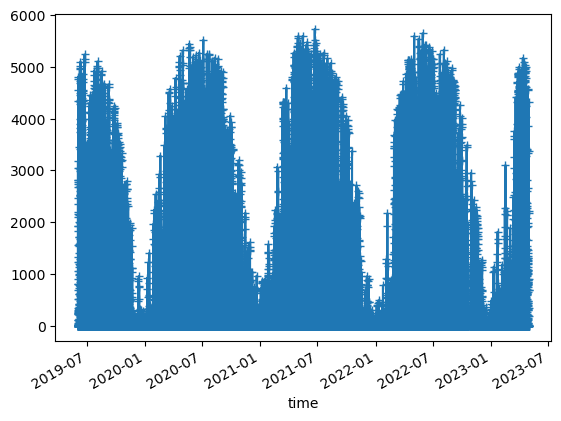

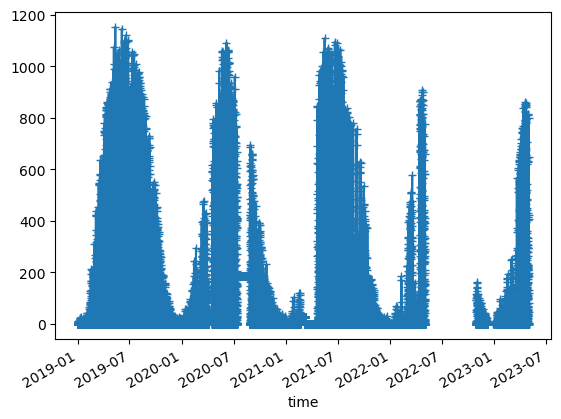

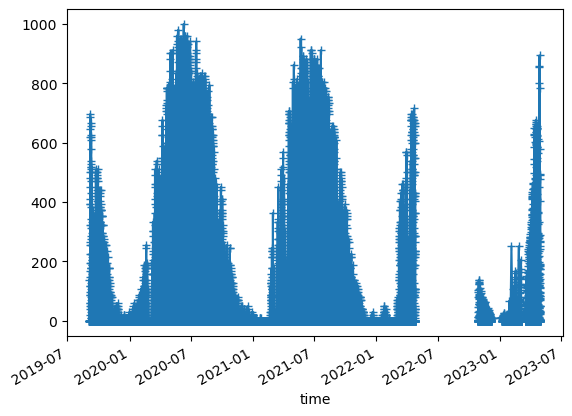

In [3]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

plt.figure()
(train_a['pv_measurement']).plot(marker = '+')
plt.figure()
train_b['pv_measurement'].plot(marker = '+')
plt.figure()
train_c['pv_measurement'].plot(marker = '+')

In [4]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [5]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

In [6]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

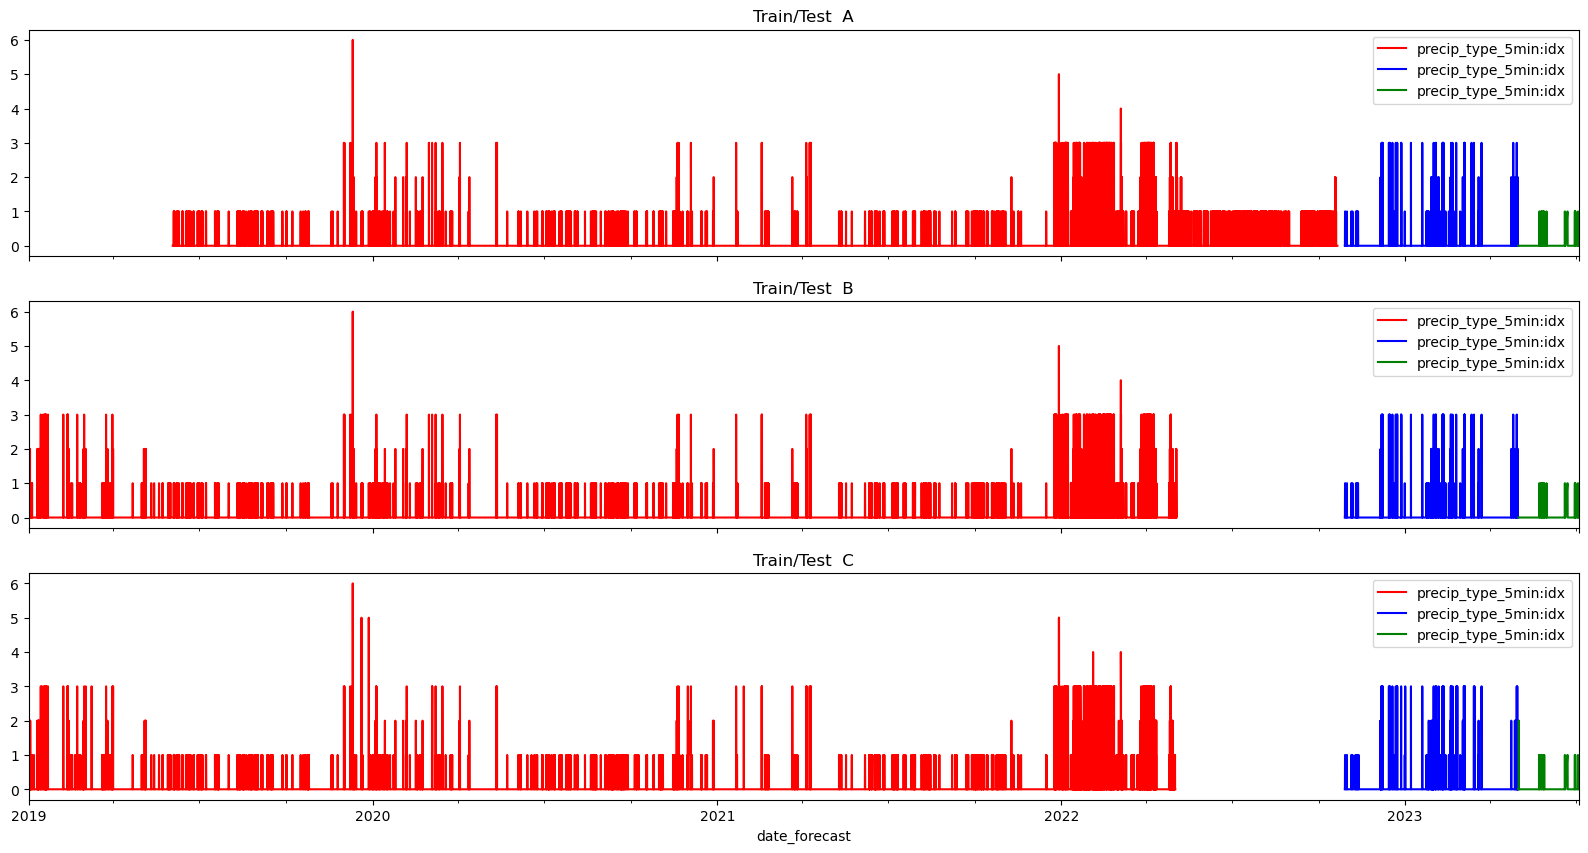

In [7]:
# Plotting a single feature
feature_name = 'precip_type_5min:idx'

fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


# Correlation Check

In [58]:
X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).corr()['effective_cloud_cover:p']
#X_train_observed_a.drop(['date_forecast'], axis = 1).corr()
#X_test_estimated_a.drop(['date_calc','date_forecast'], axis = 1).corr()

matrix_corr = X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).corr()
correlated_variables = {}
for key_1 in X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).keys():
    for key_2 in X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).keys():
        if  abs(matrix_corr[key_1][key_2]) > 0.9 and abs(matrix_corr[key_1][key_2]) != 1: 
            correlated_variables[(key_1, key_2)] = matrix_corr[key_1][key_2]
print(correlated_variables)

{('absolute_humidity_2m:gm3', 'dew_point_2m:K'): 0.9825923925578672, ('clear_sky_energy_1h:J', 'clear_sky_rad:W'): 0.9905489999326903, ('clear_sky_energy_1h:J', 'diffuse_rad:W'): 0.9045849649349028, ('clear_sky_energy_1h:J', 'diffuse_rad_1h:J'): 0.9175394751229402, ('clear_sky_rad:W', 'clear_sky_energy_1h:J'): 0.9905489999326903, ('clear_sky_rad:W', 'diffuse_rad:W'): 0.9139565352014161, ('clear_sky_rad:W', 'diffuse_rad_1h:J'): 0.9096551329627153, ('dew_point_2m:K', 'absolute_humidity_2m:gm3'): 0.9825923925578672, ('dew_point_2m:K', 't_1000hPa:K'): 0.9002278702322717, ('diffuse_rad:W', 'clear_sky_energy_1h:J'): 0.9045849649349028, ('diffuse_rad:W', 'clear_sky_rad:W'): 0.9139565352014161, ('diffuse_rad:W', 'diffuse_rad_1h:J'): 0.9866227765332353, ('diffuse_rad_1h:J', 'clear_sky_energy_1h:J'): 0.9175394751229402, ('diffuse_rad_1h:J', 'clear_sky_rad:W'): 0.9096551329627153, ('diffuse_rad_1h:J', 'diffuse_rad:W'): 0.9866227765332353, ('direct_rad:W', 'direct_rad_1h:J'): 0.9875649117141303, (

# Calculation of the locations 

# Pre-processing : 

In [23]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

#Delete features because high correlation between them (>0.9) : 
X_train_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

#Delete because constant values:
X_train_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)


In [24]:
#We match the sizes of X and Y 
#We keep the measurements from every hour only 
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

#We put the dates as the indexes of the data, and we remove some dates that are not in the corresponding y data.
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)

X_train_estimated_a_matched = X_train_estimated_a.loc[intersection_index_estimated_a]
train_a_estimated_matched = train_a.loc[intersection_index_estimated_a]
X_train_observed_a_matched = X_train_observed_a.loc[intersection_index_observed_a]
train_a_observed_matched = train_a.loc[intersection_index_observed_a]

X_train_estimated_b_matched = X_train_estimated_b.loc[intersection_index_estimated_b]
train_b_estimated_matched = train_b.loc[intersection_index_estimated_b]
X_train_observed_b_matched = X_train_observed_b.loc[intersection_index_observed_b]
train_b_observed_matched = train_b.loc[intersection_index_observed_b]

X_train_estimated_c_matched = X_train_estimated_c.loc[intersection_index_estimated_c]
train_c_estimated_matched = train_c.loc[intersection_index_estimated_c]
X_train_observed_c_matched = X_train_observed_c.loc[intersection_index_observed_c]
train_c_observed_matched = train_c.loc[intersection_index_observed_c]

X_test_estimated_a['2023-05-01 00:00:00' : '2023-05-30 00:00:00'].index

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 01:00:00',
               '2023-05-01 02:00:00', '2023-05-01 03:00:00',
               '2023-05-01 04:00:00', '2023-05-01 05:00:00',
               '2023-05-01 06:00:00', '2023-05-01 07:00:00',
               '2023-05-01 08:00:00', '2023-05-01 09:00:00',
               ...
               '2023-05-28 15:00:00', '2023-05-28 16:00:00',
               '2023-05-28 17:00:00', '2023-05-28 18:00:00',
               '2023-05-28 19:00:00', '2023-05-28 20:00:00',
               '2023-05-28 21:00:00', '2023-05-28 22:00:00',
               '2023-05-28 23:00:00', '2023-05-30 00:00:00'],
              dtype='datetime64[us]', name='date_forecast', length=265, freq=None)

In [25]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

idx = ['dew_or_rime:idx',\
       'is_day:idx', 
       'is_in_shadow:idx',
       'precip_type_5min:idx',]

for id in idx:
    concatenated_df = pd.concat([X_train_observed_a_matched[id], X_train_estimated_a_matched[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    X_train_observed_a_matched = pd.concat([X_train_observed_a_matched, df_observed_encoded], axis =1)
    X_train_estimated_a_matched = pd.concat([X_train_estimated_a_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    X_train_observed_a_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_a_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_b_matched[id], X_train_estimated_b_matched[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    X_train_observed_b_matched = pd.concat([X_train_observed_b_matched, df_observed_encoded], axis =1)
    X_train_estimated_b_matched = pd.concat([X_train_estimated_b_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    X_train_observed_b_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_b_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_c_matched[id], X_train_estimated_c_matched[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    X_train_observed_c_matched = pd.concat([X_train_observed_c_matched, df_observed_encoded], axis =1)
    X_train_estimated_c_matched = pd.concat([X_train_estimated_c_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    X_train_observed_c_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_c_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)


In [26]:
#Missing values
X_train_estimated_a_final = X_train_estimated_a_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_a_matched['cloud_base_agl:m'].mean()})

X_train_observed_a_final = X_train_observed_a_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_a_matched['cloud_base_agl:m'].mean()})

X_test_estimated_a_final = X_test_estimated_a.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_a['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_a['cloud_base_agl:m'].mean()})


X_train_estimated_b_final = X_train_estimated_b_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_b_matched['cloud_base_agl:m'].mean()})

X_train_observed_b_final = X_train_observed_b_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_b_matched['cloud_base_agl:m'].mean()})

X_test_estimated_b_final = X_test_estimated_b.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_b['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_b['cloud_base_agl:m'].mean()})


X_train_estimated_c_final = X_train_estimated_c_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_c_matched['cloud_base_agl:m'].mean()})

X_train_observed_c_final = X_train_observed_c_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_c_matched['cloud_base_agl:m'].mean()})

X_test_estimated_c_final = X_test_estimated_c.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_c['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_test_estimated_c['cloud_base_agl:m'].mean()})


In [27]:
print(X_train_estimated_a_final.shape)
print(X_train_estimated_b_final.shape)
print(X_train_estimated_c_final.columns)
for column in X_train_estimated_c_final.columns : 
    if column not in X_train_estimated_b_final.columns : 
        print(column)

(4394, 44)
(3601, 44)
Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_rad:W', 'cloud_base_agl:m',
       'diffuse_rad:W', 'direct_rad:W', 'effective_cloud_cover:p',
       'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm',
       'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm',
       'precip_5min:mm', 'pressure_100m:hPa', 'prob_rime:p', 'rain_water:kgm2',
       'relative_humidity_1000hPa:p', 'snow_depth:cm', 'snow_melt_10min:mm',
       'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p',
       'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms',
       'wind_speed_v_10m:ms', 'dew_or_rime:idx_-1.0', 'dew_or_rime:idx_0.0',
       'dew_or_rime:idx_1.0', 'is_day:idx_0.0', 'is_day:idx_1.0',
       'is_in_shadow:idx_0.0', 'is_in_shadow:idx_1.0',
       'precip_type_5min:idx_0.0', 'precip_type_5min:idx_1.0',
       'precip_type_5min:i

In [28]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

list_df_final = []
for X in [X_train_estimated_a_final, X_train_observed_a_final, X_test_estimated_a_final,\
         X_train_estimated_b_final, X_train_observed_b_final, X_test_estimated_b_final,\
         X_train_estimated_c_final, X_train_observed_c_final, X_test_estimated_c_final] : 
    columns = X.columns 
    index = X.index 
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns = columns)
    X.set_index(index, inplace= True)
    list_df_final.append(X)

In [29]:
X_train_estimated_a_final = list_df_final[0]
X_train_observed_a_final = list_df_final[1]
X_test_estimated_a_final = list_df_final[2]

X_train_estimated_b_final = list_df_final[3]
X_train_observed_b_final = list_df_final[4]
X_test_estimated_b_final = list_df_final[5]

X_train_estimated_c_final = list_df_final[6]
X_train_observed_c_final = list_df_final[7]
X_test_estimated_c_final = list_df_final[8]

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,precip_5min:mm,pressure_100m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_depth:cm,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,dew_or_rime:idx_-1.0,dew_or_rime:idx_0.0,dew_or_rime:idx_1.0,is_day:idx_0.0,is_day:idx_1.0,is_in_shadow:idx_0.0,is_in_shadow:idx_1.0,precip_type_5min:idx_0.0,precip_type_5min:idx_1.0,precip_type_5min:idx_2.0,precip_type_5min:idx_3.0,precip_type_5min:idx_5.0,precip_type_5min:idx_6.0
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.0
mean,0.396485,0.430451,0.259343,0.092734,0.141037,0.077196,0.048673,0.683182,0.0,0.033606,0.010556,0.042032,0.015769,0.021903,0.011724,0.544670,0.005663,0.007909,0.651269,0.043413,0.004307,0.024053,0.496098,0.430884,0.036059,0.573438,0.737253,0.487272,0.296429,0.415229,0.514319,0.020255,0.949704,0.030041,0.652025,0.347975,0.304506,0.695494,0.955621,0.024579,0.007965,0.011834,0.0,0.0
std,0.193878,0.185723,0.175411,0.202978,0.147475,0.154351,0.149421,0.358845,0.0,0.108531,0.059171,0.110891,0.073114,0.086820,0.061471,0.203366,0.048592,0.057033,0.179075,0.150516,0.042457,0.061321,0.284768,0.238270,0.093897,0.177220,0.363183,0.251631,0.173035,0.176943,0.146642,0.140891,0.218586,0.170714,0.476381,0.476381,0.460244,0.460244,0.205957,0.154853,0.088902,0.108154,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.256410,0.308642,0.127954,0.000000,0.047296,0.000000,0.000000,0.421000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398639,0.000000,0.000000,0.528662,0.000000,0.000000,0.000000,0.253359,0.236910,0.000000,0.461831,0.479250,0.281671,0.153846,0.289017,0.421488,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.371795,0.413581,0.259343,0.000000,0.101364,0.000000,0.000000,0.851000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547278,0.000000,0.000000,0.677707,0.000000,0.000000,0.000000,0.508327,0.438483,0.000000,0.572519,0.980000,0.507360,0.269231,0.398844,0.520661,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.525641,0.549383,0.314297,0.052654,0.151457,0.078057,0.001846,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687679,0.000000,0.000000,0.788535,0.000000,0.000000,0.031250,0.739006,0.597765,0.000000,0.690839,1.000000,0.700387,0.403846,0.502890,0.603306,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

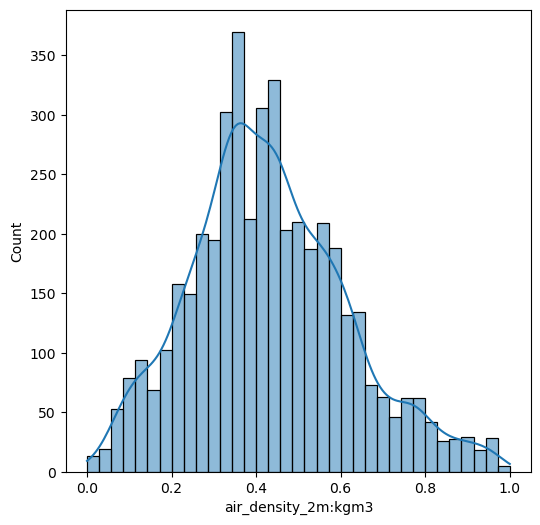

In [30]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X_train_estimated_a_final['air_density_2m:kgm3']
sns.histplot(data=f, kde=True)

X_train_estimated_a_final.describe()

In [31]:
transformations = [['absolute_humidity_2m:gm3', 'f'],
 ['air_density_2m:kgm3', '1/f'],
 ['ceiling_height_agl:m', 'f'],
 ['clear_sky_rad:W', 'f'],
 ['cloud_base_agl:m', 'logfc'],
 ['dew_or_rime:idx', 'hot'],
 ['effective_cloud_cover:p', 'f^2'],
 ['elevation:m', 'constant'],
 ['fresh_snow_12h:cm', 'loglogf ou rien'],
 ['fresh_snow_1h:cm', 'loglogf ou rien'],
 ['fresh_snow_24h:cm', 'loglogf ou rien'],
 ['fresh_snow_3h:cm', 'loglogf ou rien'],
 ['fresh_snow_6h:cm', 'loglogf ou rien'],
 ['is_day:idx', 'hot'],
 ['is_in_shadow:idx', 'hot'],
 ['precip_5min:mm', 'loglogf ou rien'],
 ['precip_type_5min:idx', 'hot'],
 ['pressure_100m:hPa', 'rien'],
 ['prob_rime:p', 'loglogf ou rien'],
 ['rain_water:kgm2', 'one hot à faire !'],
 ['relative_humidity_1000hPa:p', ''],
 ['snow_density:kgm3', 'constant'],
 ['snow_depth:cm', 'loglogf ou rien'],
 ['snow_drift:idx', 'hot'],
 ['snow_melt_10min:mm', 'loglogf ou rien'],
 ['snow_water:kgm2', 'loglogf ou rien'],
 ['sun_azimuth:d', 'f ou f^2'],
 ['sun_elevation:d', 'f ou f^2'],
 ['super_cooled_liquid_water:kgm2', 'loglogf ou rien'],
 ['t_1000hPa:K', 'f^2'],
 ['total_cloud_cover:p', 'f^2 ou rien'],
 ['visibility:m', 'f'],
 ['wind_speed_10m:ms', 'f ou logfc'],
 ['wind_speed_u_10m:ms', 'f ou logfc'],
 ['wind_speed_v_10m:ms', 'f'],
 ['wind_speed_w_1000hPa:ms', 'hot']]

In [32]:
for X in [X_train_estimated_a_final, X_train_observed_a_final, X_test_estimated_a_final,\
         X_train_estimated_b_final, X_train_observed_b_final, X_test_estimated_b_final,\
         X_train_estimated_c_final, X_train_observed_c_final, X_test_estimated_c_final] : 
    for feature, function in transformations:
        if function == '1/f':
            X[feature] = 1/(X[feature]+.5)
        if function == 'logfc':
            X[feature] = np.log(X[feature] + (X[feature].quantile(.25)/X[feature].quantile(.75))**2 )
        if function == 'f^2':
            X[feature] = (X[feature])**2
        if function == 'logf':
            X[feature] = np.log(X[feature]+.001)
        if function == 'loglogf':
            X[feature] = np.log(np.log(X[feature]+1)+1)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,diffuse_rad:W,direct_rad:W,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,precip_5min:mm,pressure_100m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,snow_depth:cm,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,dew_or_rime:idx_-1.0,dew_or_rime:idx_0.0,dew_or_rime:idx_1.0,is_day:idx_0.0,is_day:idx_1.0,is_in_shadow:idx_0.0,is_in_shadow:idx_1.0,precip_type_5min:idx_0.0,precip_type_5min:idx_1.0,precip_type_5min:idx_2.0,precip_type_5min:idx_3.0,precip_type_5min:idx_5.0,precip_type_5min:idx_6.0
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.0
mean,0.396485,1.119031,0.259343,0.092734,-1.568455,0.077196,0.048673,0.595478,0.0,0.033606,0.010556,0.042032,0.015769,0.021903,0.011724,0.544670,0.005663,0.007909,0.651269,0.043413,0.004307,0.024053,0.496098,0.430884,0.036059,0.360231,0.737253,0.487272,0.296429,0.415229,0.514319,0.020255,0.949704,0.030041,0.652025,0.347975,0.304506,0.695494,0.955621,0.024579,0.007965,0.011834,0.0,0.0
std,0.193878,0.230443,0.175411,0.202978,0.488740,0.154351,0.149421,0.401537,0.0,0.108531,0.059171,0.110891,0.073114,0.086820,0.061471,0.203366,0.048592,0.057033,0.179075,0.150516,0.042457,0.061321,0.284768,0.238270,0.093897,0.201043,0.363183,0.251631,0.173035,0.176943,0.146642,0.140891,0.218586,0.170714,0.476381,0.476381,0.460244,0.460244,0.205957,0.154853,0.088902,0.108154,0.0,0.0
min,0.000000,0.666666,0.000000,0.000000,-2.327771,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.256410,0.952941,0.127954,0.000000,-1.932344,0.000000,0.000000,0.177241,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398639,0.000000,0.000000,0.528662,0.000000,0.000000,0.000000,0.253359,0.236910,0.000000,0.213288,0.479250,0.281671,0.153846,0.289017,0.421488,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.371795,1.094594,0.259343,0.000000,-1.615070,0.000000,0.000000,0.724201,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547278,0.000000,0.000000,0.677707,0.000000,0.000000,0.000000,0.508327,0.438483,0.000000,0.327778,0.980000,0.507360,0.269231,0.398844,0.520661,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.525641,1.236641,0.314297,0.052654,-1.390424,0.078057,0.001846,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687679,0.000000,0.000000,0.788535,0.000000,0.000000,0.031250,0.739006,0.597765,0.000000,0.477258,1.000000,0.700387,0.403846,0.502890,0.603306,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,2.000000,1.000000,1.000000,0.093047,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

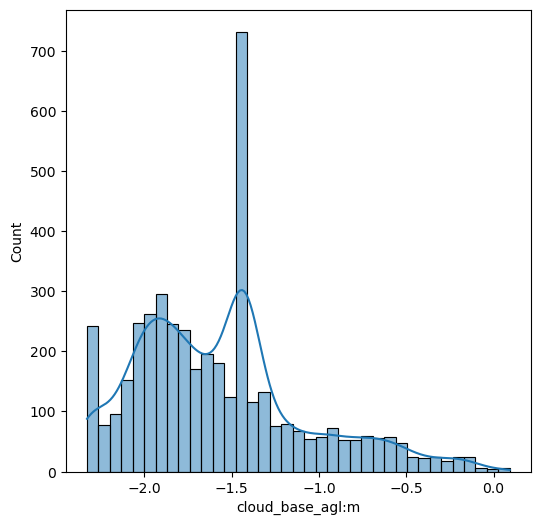

In [33]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X_train_estimated_a_final['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

X_train_estimated_a_final.describe()

In [34]:
list_to_delete_a = ['precip_type_5min:idx_6.0', 
                    'dew_or_rime:idx_-1.0', 
                    'is_day:idx_1.0',
                    'is_in_shadow:idx_0.0', 
                    'precip_type_5min:idx_5.0',
                    'snow_melt_10min:mm', 
                    'snow_depth:cm', 
                    'dew_or_rime:idx_0.0',
                    'is_in_shadow:idx_1.0', 
                    'fresh_snow_6h:cm', 
                    'fresh_snow_3h:cm',
                    'prob_rime:p', 
                    'fresh_snow_1h:cm', 
                    'precip_type_5min:idx_2.0',
                    'elevation:m', 
                    'precip_type_5min:idx_3.0', 
                    'dew_or_rime:idx_1.0',
                    'fresh_snow_12h:cm', 
                    'is_day:idx_0.0',
                    'super_cooled_liquid_water:kgm2']

list_to_delete_b = ['precip_type_5min:idx_6.0',
                    'dew_or_rime:idx_-1.0',
                    'precip_type_5min:idx_5.0',
                    'snow_melt_10min:mm',
                    'snow_depth:cm',
                    'dew_or_rime:idx_0.0',
                    'rain_water:kgm2',
                    'prob_rime:p',
                    'dew_or_rime:idx_1.0',
                    'is_day:idx_0.0',
                    'fresh_snow_6h:cm',
                    'fresh_snow_3h:cm',
                    'fresh_snow_1h:cm',
                    'fresh_snow_12h:cm',
                    'elevation:m',
                    'is_day:idx_1.0',
                    'is_in_shadow:idx_0.0',
                    'is_in_shadow:idx_1.0',
                    'precip_type_5min:idx_2.0',
                    'precip_type_5min:idx_3.0']

list_to_delete_c = ['precip_type_5min:idx_6.0',
                    'is_day:idx_1.0',
                    'fresh_snow_6h:cm',
                    'fresh_snow_3h:cm',
                    'precip_type_5min:idx_5.0',
                    'fresh_snow_1h:cm',
                    'is_in_shadow:idx_1.0',
                    'precip_type_5min:idx_1.0',
                    'elevation:m',
                    'precip_type_5min:idx_2.0',
                    'precip_type_5min:idx_3.0',
                    'dew_or_rime:idx_0.0',
                    'precip_type_5min:idx_4.0',
                    'dew_or_rime:idx_1.0',
                    'is_day:idx_0.0',
                    'dew_or_rime:idx_-1.0',
                    'prob_rime:p']

X_train_observed_a_final.drop(list_to_delete_a, axis = 1, inplace = True)
X_train_estimated_a_final.drop(list_to_delete_a, axis = 1, inplace = True)
X_test_estimated_a_final.drop(list_to_delete_a, axis = 1, inplace = True)

X_train_observed_b_final.drop(list_to_delete_b, axis = 1, inplace = True)
X_train_estimated_b_final.drop(list_to_delete_b, axis = 1, inplace = True)
X_test_estimated_b_final.drop(list_to_delete_b, axis = 1, inplace = True)

X_train_observed_c_final.drop(list_to_delete_c, axis = 1, inplace = True)
X_train_estimated_c_final.drop(list_to_delete_c, axis = 1, inplace = True)
X_test_estimated_c_final.drop(list_to_delete_c, axis = 1, inplace = True)

In [35]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a_scaled = scaler.fit_transform(X_train_estimated_a_final)
X_train_observed_a_scaled = scaler.fit_transform(X_train_observed_a_final)
X_test_estimated_a_scaled = scaler.fit_transform(X_test_estimated_a_final)

X_train_estimated_b_scaled = scaler.fit_transform(X_train_estimated_b_final)
X_train_observed_b_scaled = scaler.fit_transform(X_train_observed_b_final)
X_test_estimated_b_scaled = scaler.fit_transform(X_test_estimated_b_final)

X_train_estimated_c_scaled = scaler.fit_transform(X_train_estimated_c_final)
X_train_observed_c_scaled = scaler.fit_transform(X_train_observed_c_final)
X_test_estimated_c_scaled = scaler.fit_transform(X_test_estimated_c_final)

<Axes: xlabel='cloud_base_agl:m', ylabel='Count'>

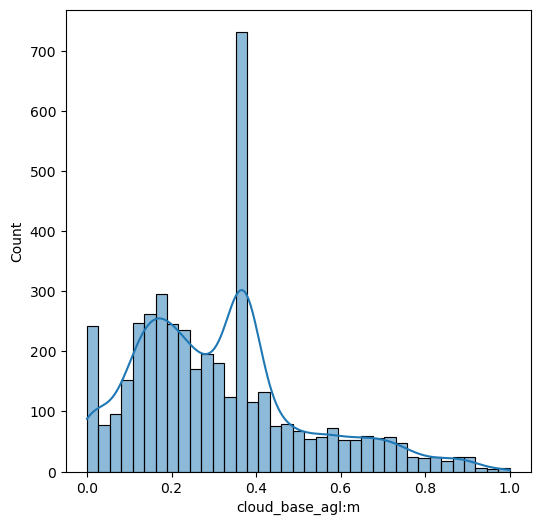

In [36]:
X = pd.DataFrame(X_train_estimated_a_scaled, columns = X_train_estimated_a_final.columns)
X.set_index(X_train_estimated_a_final.index, inplace= True)
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

In [37]:
X_train_total_a = np.concatenate((X_train_observed_a_scaled, X_train_estimated_a_scaled), axis = 0)
X_train_total_b = np.concatenate((X_train_observed_b_scaled, X_train_estimated_b_scaled), axis = 0)
X_train_total_c = np.concatenate((X_train_observed_c_scaled, X_train_estimated_c_scaled), axis = 0)

# Comparaison de modèles : 

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from lightgbm import LGBMRegressor

In [39]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))
          ]

In [41]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_a_scaled, train_a_observed_matched.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_a_scaled)
    y_test = train_a_estimated_matched.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 315.3237184438241
MAE for Ridge = 306.73551827036147
MAE for Lasso = 241.78104306824815
MAE for ElasticNet = 569.7302944007286
MAE for CART = 227.336654528903
MAE for RF = 166.0587424897588
MAE for SVR = 227.94698293509217
MAE for GBM = 160.5875814994888
MAE for XGBoost = 191.92379150401925


In [43]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_b_scaled, train_b_observed_matched.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_b_scaled)
    y_test = train_b_estimated_matched.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 38.48286627028718
MAE for Ridge = 38.42251885287693
MAE for Lasso = 34.24823447118315
MAE for ElasticNet = 90.44955739564678
MAE for CART = 57.2677083585144
MAE for RF = 47.282767597990976
MAE for SVR = 26.53405045853873
MAE for GBM = 32.59459867347493
MAE for XGBoost = 42.92303035447479


In [479]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_c_scaled, train_c_observed_matched.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_c_scaled)
    y_test = train_c_estimated_matched.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 42.47137891322842
MAE for Ridge = 42.206948278850255
MAE for Lasso = 31.70976934147288
MAE for ElasticNet = 54.996592107779335
MAE for CART = 40.092257110352676
MAE for RF = 33.46575130830489
MAE for SVR = 24.31443638640415
MAE for GBM = 34.16352378662542
MAE for XGBoost = 34.25450198899329


# Prédiction sans LR pour la location A

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    #'max_depth': [3, 5, 7],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    'loss' : ['absolute_error']
}

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn.metrics import make_scorer, mean_absolute_error
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# A sample parameter
parameters = {    "learning_rate": [0.01, 0.05, 0.1],#, 0.1, 0.15, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    #"max_depth":[3,5,8],
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[50, 100, 200]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingRegressor(), parameters,scoring=mae_scorer,refit=False,cv=2, n_jobs=-1, verbose = 3)

clf.fit(X_train_total_a, pd.concat([train_a_observed_matched, train_a_estimated_matched]).to_numpy().ravel())
#converting the clf.cv_results to dataframe
df=pd.DataFrame.from_dict(clf.cv_results_)
#here Possible inputs for cross validation is cv=2, there two split split0 and split1

Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [64]:
clf.best_params_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,35.948740,0.316694,0.044369,0.010272,0.01,{'learning_rate': 0.01},-411.912528,-426.955813,-419.434170,7.521642,2
1,35.910916,0.325063,0.049150,0.012510,0.025,{'learning_rate': 0.025},-262.353850,-270.863705,-266.608778,4.254927,1


In [224]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor())]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_a, pd.concat([train_a_observed_matched, train_a_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_a_scaled)
    df_pred_a = pd.DataFrame({'prediction' : y_pred})
    df_pred_a.set_index(X_test_estimated_a_final.index, inplace = True)


<Axes: xlabel='time'>

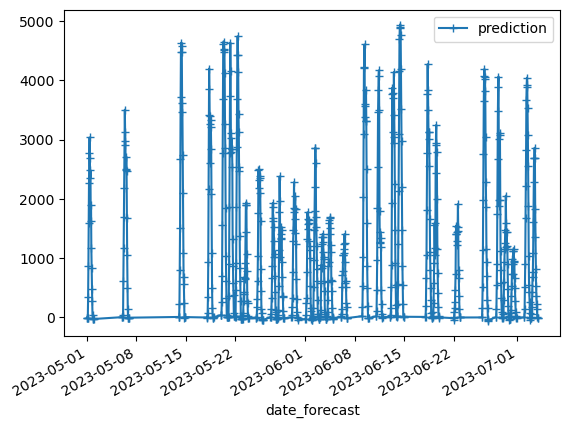

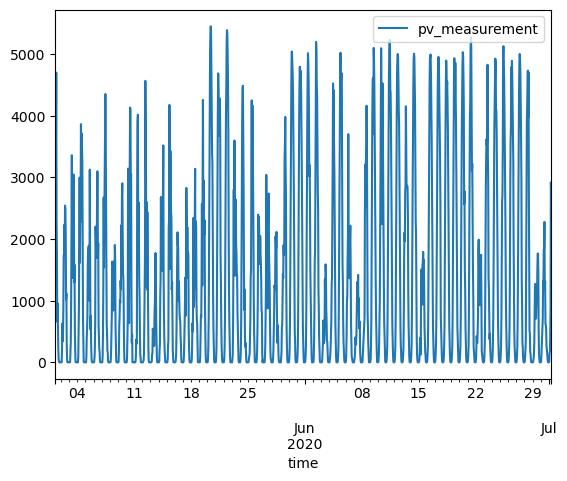

<Figure size 640x480 with 0 Axes>

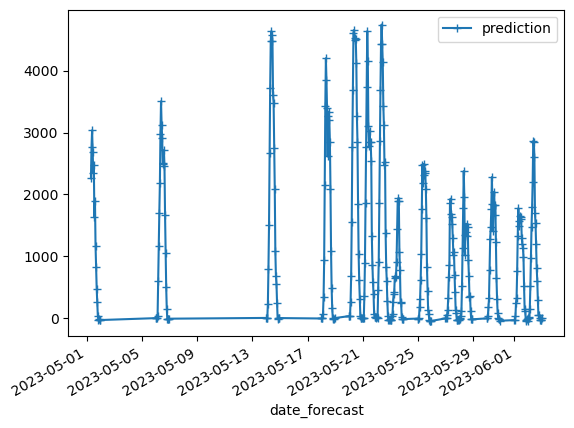

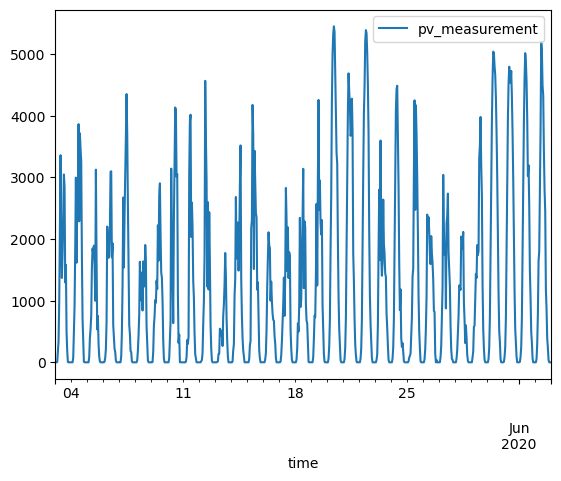

In [225]:
df_pred_a.plot(marker = '+'), train_a['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_a['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_a['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [226]:
for date in df_pred_a.index : 
    if df_pred_a.loc[date]['prediction'] < 0 :
        df_pred_a.loc[date]['prediction'] = 0

In [227]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a.reset_index(inplace = True)
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,A
1,1,2023-05-01 01:00:00,0.000000,A
2,2,2023-05-01 02:00:00,0.000000,A
3,3,2023-05-01 03:00:00,0.000000,A
4,4,2023-05-01 04:00:00,336.639604,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,226.056660,A
716,716,2023-07-03 20:00:00,145.477311,A
717,717,2023-07-03 21:00:00,7.600512,A
718,718,2023-07-03 22:00:00,0.000000,A


# Prédictions pour la location B

In [228]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor())]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_b, pd.concat([train_b_observed_matched, train_b_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_b_scaled)
    df_pred_b = pd.DataFrame({'prediction' : y_pred})
    df_pred_b.set_index(X_test_estimated_b_final.index, inplace = True)

<Axes: xlabel='time'>

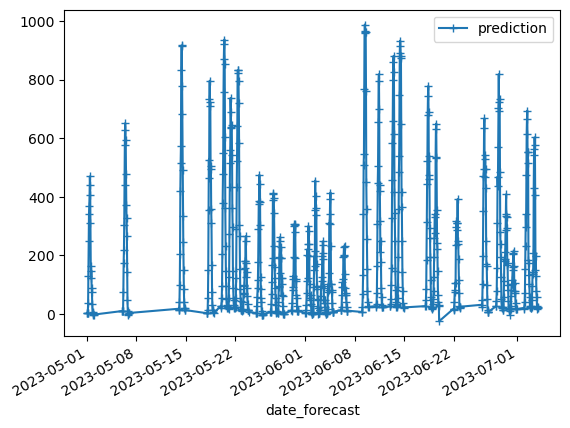

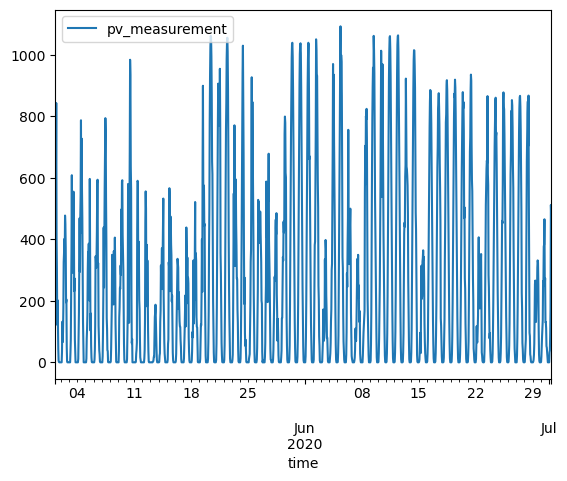

<Figure size 640x480 with 0 Axes>

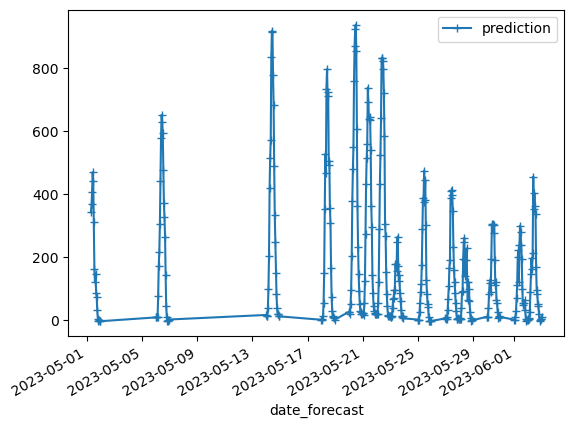

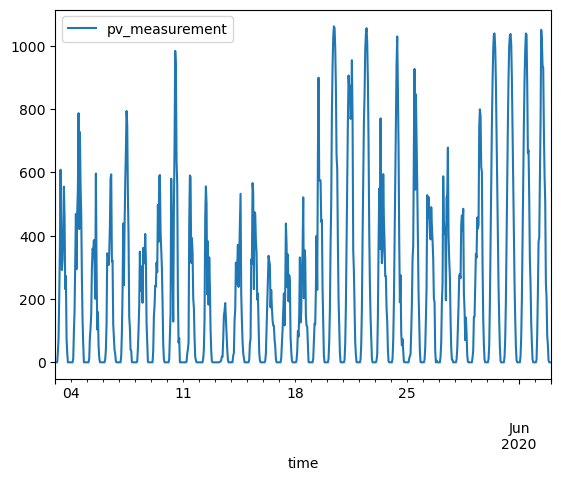

In [229]:
df_pred_b.plot(marker = '+'), train_b['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_b['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_b['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [230]:
for date in df_pred_b.index : 
    if df_pred_b.loc[date]['prediction'] < 0 :
        df_pred_b.loc[date]['prediction'] = 0

In [231]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b.reset_index(inplace = True)
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

,id,time,prediction,location
0,0,2023-05-01 00:00:00,3.124901,B
1,1,2023-05-01 01:00:00,2.800039,B
2,2,2023-05-01 02:00:00,3.124901,B
3,3,2023-05-01 03:00:00,4.561740,B
4,4,2023-05-01 04:00:00,35.734792,B
...,...,...,...,...
715,715,2023-07-03 19:00:00,58.975702,B
716,716,2023-07-03 20:00:00,26.178738,B
717,717,2023-07-03 21:00:00,14.948157,B
718,718,2023-07-03 22:00:00,22.088606,B


# Prédictions pour la location C


In [232]:
from sklearn.ensemble import GradientBoostingRegressor
models = [('GBM', GradientBoostingRegressor())]
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_total_c, pd.concat([train_c_observed_matched, train_c_estimated_matched], axis = 0).to_numpy().ravel())
    y_pred = regressor.predict(X_test_estimated_c_scaled)
    df_pred_c = pd.DataFrame({'prediction' : y_pred})
    df_pred_c.set_index(X_test_estimated_c_final.index, inplace = True)

<Axes: xlabel='time'>

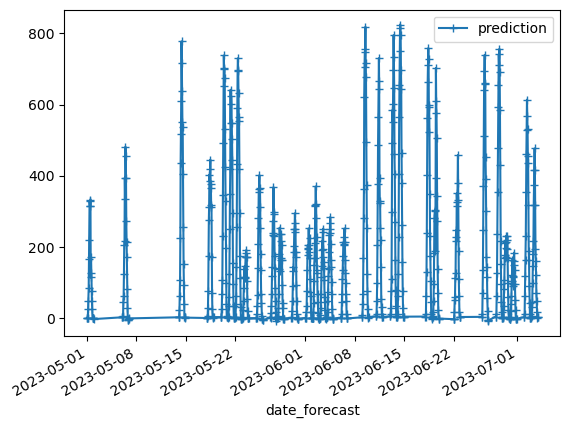

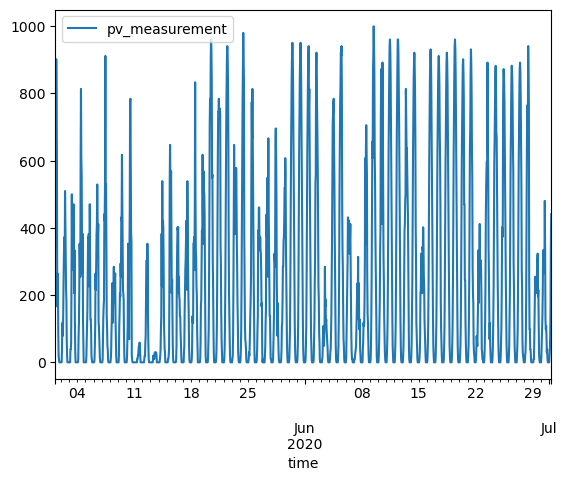

<Figure size 640x480 with 0 Axes>

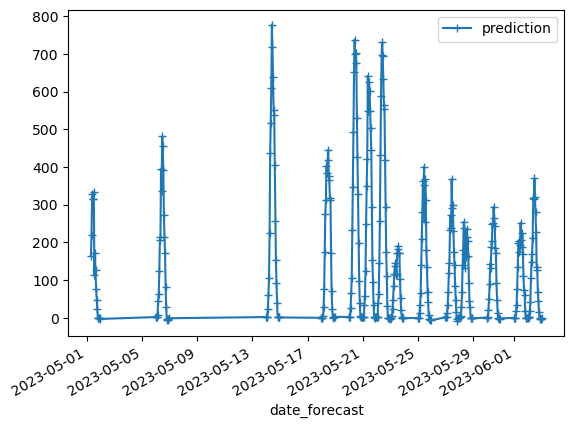

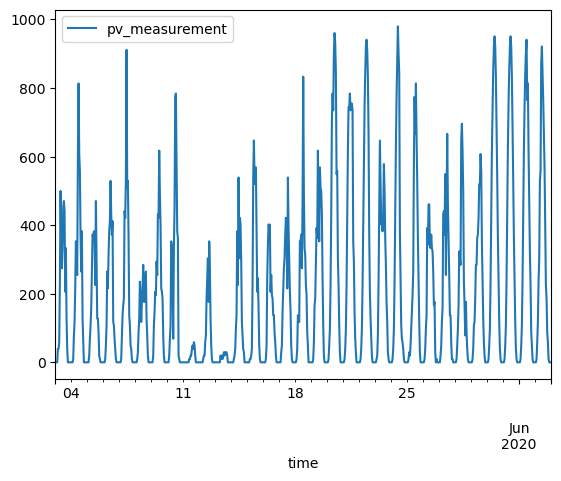

In [233]:
df_pred_c.plot(marker = '+'), train_c['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_c['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_c['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()


In [234]:
for date in df_pred_c.index : 
    if df_pred_c.loc[date]['prediction'] < 0 :
        df_pred_c.loc[date]['prediction'] = 0

In [235]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c.reset_index(inplace = True)
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.375875,C
1,1,2023-05-01 01:00:00,0.375875,C
2,2,2023-05-01 02:00:00,0.511135,C
3,3,2023-05-01 03:00:00,0.375875,C
4,4,2023-05-01 04:00:00,25.495095,C
...,...,...,...,...
715,715,2023-07-03 19:00:00,46.668653,C
716,716,2023-07-03 20:00:00,17.464187,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,1.153369,C


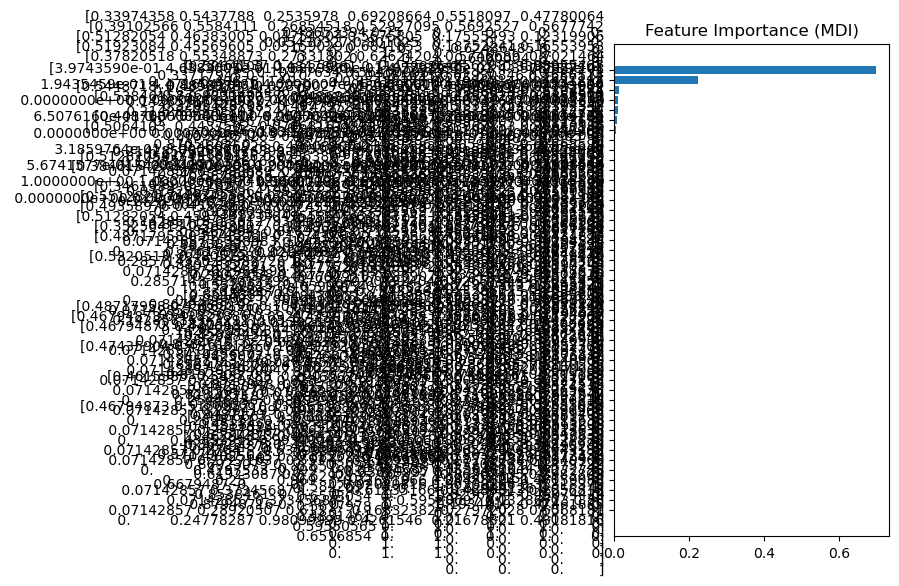

In [257]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_total_c[sorted_idx]))
plt.title("Feature Importance (MDI)")

fig.tight_layout()
plt.show()

In [253]:
feature_importance

array([4.13633159e-03, 1.01667483e-03, 6.48910494e-04, 6.99508993e-01,
       2.72886807e-04, 1.07229095e-02, 2.23173327e-01, 2.68186468e-03,
       0.00000000e+00, 1.61793301e-04, 0.00000000e+00, 3.47958683e-03,
       0.00000000e+00, 0.00000000e+00, 2.28076279e-03, 8.75773731e-03,
       0.00000000e+00, 3.79580753e-05, 2.58990562e-03, 4.15342273e-05,
       7.42381501e-04, 4.07392298e-04, 4.03541756e-03, 3.88201259e-03,
       8.78873884e-05, 1.45903356e-02, 3.25126084e-04, 1.16340371e-02,
       1.58149717e-03, 2.67140491e-03, 4.02043832e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.55175168e-05, 0.00000000e+00, 1.13770114e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [258]:
feature_importance[sorted_idx]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.55175168e-05, 3.79580753e-05, 4.15342273e-05,
       8.78873884e-05, 1.13770114e-04, 1.61793301e-04, 2.72886807e-04,
       3.25126084e-04, 4.02043832e-04, 4.07392298e-04, 6.48910494e-04,
       7.42381501e-04, 1.01667483e-03, 1.58149717e-03, 2.28076279e-03,
       2.58990562e-03, 2.67140491e-03, 2.68186468e-03, 3.47958683e-03,
       3.88201259e-03, 4.03541756e-03, 4.13633159e-03, 8.75773731e-03,
       1.07229095e-02, 1.16340371e-02, 1.45903356e-02, 2.23173327e-01,
       6.99508993e-01])

In [284]:
X_train_observed_c_final['precip_type_5min:idx_0.0'].sum()

21915.0

In [259]:
np.argsort(feature_importance)

array([44, 35, 13, 12, 43, 10, 37, 39,  8, 40, 41, 32, 42, 33, 34, 31, 16,
       36, 17, 19, 24, 38,  9,  4, 26, 30, 21,  2, 20,  1, 28, 14, 18, 29,
        7, 11, 23, 22,  0, 15,  5, 27, 25,  6,  3])

In [290]:
X_train_estimated_c_final.iloc[:,15]

2022-10-28 22:00:00    0.408956
2022-10-28 23:00:00    0.389553
2022-10-29 00:00:00    0.352240
2022-10-29 01:00:00    0.341792
2022-10-29 02:00:00    0.335821
                         ...   
2023-04-30 19:00:00    0.602985
2023-04-30 20:00:00    0.604478
2023-04-30 21:00:00    0.601494
2023-04-30 22:00:00    0.600000
2023-04-30 23:00:00    0.595523
Name: pressure_100m:hPa, Length: 2930, dtype: float32

# Gather all the predictions

In [236]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
df_pred_total
#df_pred_final[0:100]

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,A
1,1,2023-05-01 01:00:00,0.000000,A
2,2,2023-05-01 02:00:00,0.000000,A
3,3,2023-05-01 03:00:00,0.000000,A
4,4,2023-05-01 04:00:00,336.639604,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,46.668653,C
716,716,2023-07-03 20:00:00,17.464187,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,1.153369,C


In [240]:
df_pred_final.to_csv('submission_3.csv', index=False)

In [239]:
train_a[0:150]

,pv_measurement
time,
2019-06-02 22:00:00,0.00
2019-06-02 23:00:00,0.00
2019-06-03 00:00:00,0.00
2019-06-03 01:00:00,0.00
2019-06-03 02:00:00,19.36
2019-06-03 03:00:00,251.02
2019-06-03 04:00:00,263.78
2019-06-03 05:00:00,522.72
2019-06-03 06:00:00,904.42
